# Requirements:
We need to be able to sample from a discrete Gaussian distribution, d times. Then each coefficient needs to be modulo q. Then, the coefficients must be parsed into a polynomial of dimension d. This discrete Gaussian is centred at origin, and the maximum value must be B, where B = 6*sigma. 

## Plans to implement
1. We can take a simple gaussian and the closest integer function.
2. We can find a discrete gaussian in python


In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

### Defining constants

In [29]:
pi = 3.141592653589793
exp= 2.718281828459045
B = 1001
sigma = np.floor(B//6)
d = 5 # x^5 + x^4 + ...
q = 23

In [10]:
probabilities = []


def genProbabilities():
    global probabilities
    sum = 0
    for i in range (-1*B+1, B):
        x = exp**(-pi*(i**2)/sigma**2)
        probabilities.append(x)
        sum += x
    probabilities[:] = [x / sum for x in probabilities]

genProbabilities()

Text(0, 0.5, 'Probability of selection')

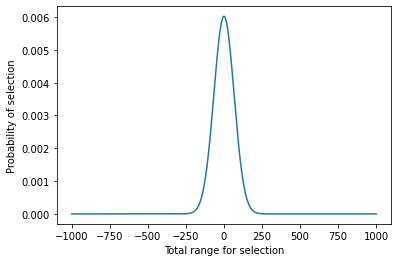

In [11]:
x = range(-1*B+1, B)
y = probabilities
plt.plot(x, y)
plt.xlabel('Total range for selection') #later we'll take modulo q. 
plt.ylabel('Probability of selection') 

In [12]:
sampleList = []
for i in range (0, 10240):    
    sampleList.append(np.random.choice(np.arange(-1000, 1001), p=probabilities))
print(max(sampleList))

240


In [19]:
def sample():
    return np.random.choice(np.arange(-1*B+1, B), p=probabilities)


In [26]:
x=0
for i in range(10):
    a = sample()
    x+=a
    print(a)
print("Sum =", x)

-66
9
107
35
-64
-2
42
-86
-82
21
Sum = -86


In [30]:
def chi():
    coeff = np.array([sample()%q for i in range(d+1)])
    return coeff


In [31]:
print(chi())

[16  4 17 11  7 10]
